In [1]:
using PyPlot
using NPZ
using DelimitedFiles
using LaTeXStrings
using JLD2
using MAT
using LaTeXStrings
using DelimitedFiles
using ColorSchemes
using Statistics
pwd()
PyPlot.matplotlib[:rc]("font",family="serif",size=12)

In [2]:
MARKERSIZE = 7
LINEWIDTH=4
LEGENDFONTSIZE=24
LABELFONTSIZE=24
TICKFONTSIZE=24
cm = get_cmap(:tab20)
colorrange = (0:19) ./ 20

0.0:0.05:0.95

In [3]:
function contourplot1(ax,file)
    levels = 0:1:40
    data = readdlm(file,skipstart=9)
    data_size = Int64(sqrt(size(data,1)))
    phi  = reshape(data[:,1],data_size,data_size)
    psi  = reshape(data[:,2],data_size,data_size)
    ene  = reshape(data[:,3],data_size,data_size)
#     a=ax.contour(phi,psi,ene.-minimum(ene),levels,colors="k")
    ax.contourf(phi,psi,ene.-minimum(ene),levels,cmap=cm,extend="max")
#     setp(ax.get_xticklabels(),visible=false)
#     setp(ax.get_yticklabels(),visible=false)
end
function contourplot3(ax,file)
    levels = 0:1:40
    data = readdlm(file,skipstart=10)
    data_size = Int64(sqrt(size(data,1)))
    phi  = reshape(data[:,1],data_size,data_size)
    psi  = reshape(data[:,2],data_size,data_size)
    ene  = reshape(data[:,3],data_size,data_size)
#     a=ax.contour(phi,psi,ene.-minimum(ene),levels,colors="k")
    h = ax.contourf(phi,psi,ene.-minimum(ene),levels,cmap=cm,extend="max")
#     setp(ax.get_xticklabels(),visible=false)
#     setp(ax.get_yticklabels(),visible=false)
end
function contourplot2(ax,file)
    levels = 0:1:40
    data = npzread(file)
#     a=ax.contour(data["X"],data["Y"],data["Z"].-minimum(data["Z"]),levels,colors="k")
    ax.contourf(data["X"],data["Y"],data["Z"].-minimum(data["Z"]),levels,cmap=cm,extend="max")
#     setp(ax.get_xticklabels(),visible=false)
#     setp(ax.get_yticklabels(),visible=false)
end

contourplot2 (generic function with 1 method)

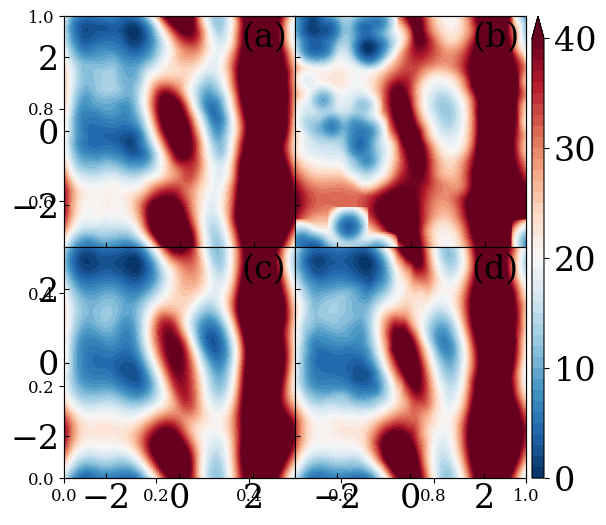

In [12]:
cm = get_cmap(:RdBu_r)
fig, ax = plt.subplots(figsize=(6,6))
# fig, ax = plt.subplots()
subplots_adjust(wspace=0.0,hspace=0.0,top = 0.87, bottom = 0.87-0.77, right = 0.86, left = 0.09) # Set the vertical spacing between axes
vec = 2:5:20
ax11 = plt.subplot(2,2,1)
ax12 = plt.subplot(2,2,2)
ax13 = plt.subplot(2,2,3)
ax14 = plt.subplot(2,2,4)

contourplot1(ax11,"./2D_2/fes.dat")
contourplot3(ax12,"./ves/ves_100000000/reweight")
contourplot2(ax13,"/mnt/ufs18/rs-003/MultiscaleML_group/Liyao/plumed/rid/source/ala2.rid/data01.npz")
h = contourplot2(ax14,"./consensus11/data10.npz")

ax11.tick_params(direction="in")
ax12.tick_params(direction="in")
ax13.tick_params(direction="in")
ax14.tick_params(direction="in")

ax11.set_yticks(-2:2:3)
ax13.set_xticks(-2:2:3)
ax13.set_yticks(-2:2:3)
ax14.set_xticks(-2:2:3)

setp(ax11.get_xticklabels(),visible=false)
setp(ax12.get_xticklabels(),visible=false)
setp(ax12.get_yticklabels(),visible=false)
setp(ax14.get_yticklabels(),visible=false)
ax13.tick_params(axis="x",labelsize=TICKFONTSIZE)
ax14.tick_params(axis="x",labelsize=TICKFONTSIZE)
ax11.tick_params(axis="y",labelsize=TICKFONTSIZE)
ax13.tick_params(axis="y",labelsize=TICKFONTSIZE)

pos = 2.3
ax11.text(pos,pos,"(a)",fontsize=TICKFONTSIZE,ha="center")
ax12.text(pos,pos,"(b)",fontsize=TICKFONTSIZE,ha="center")
ax13.text(pos,pos,"(c)",fontsize=TICKFONTSIZE,ha="center")
ax14.text(pos,pos,"(d)",fontsize=TICKFONTSIZE,ha="center")

cbar_ax = fig.add_axes([0.87, 0.1, 0.02, 0.77])
plt.colorbar(h, cax=cbar_ax, ticks=0:10:40)
cbar_ax.tick_params(labelsize=TICKFONTSIZE)
# cbar_ax.set_yticklabels([0:20:100]) 

plt.savefig("../figure/ala2_2D.eps")
plt.savefig("../figure/ala2_2D.pdf")


l_infty: 21.03946563534019
l_2: 5.390964800139037
l_infty: 11.049797204407227
l_2: 3.1507120371728057
l_infty: 10.68301397780273
l_2: 1.8834298921458712


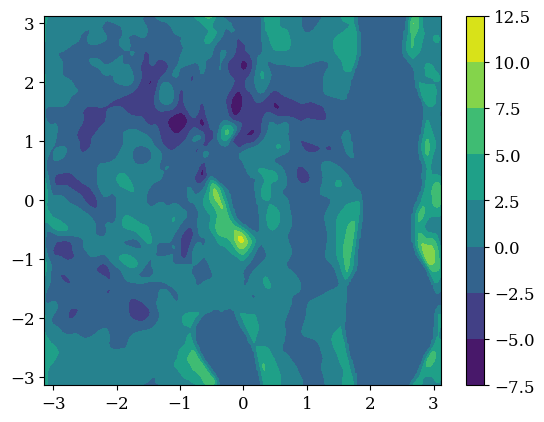

PyObject <matplotlib.colorbar.Colorbar object at 0x2b0bdf07ff40>

In [16]:
using LinearAlgebra
levels = 0:1:60
max = 40
data = readdlm("./2D_2/fes.dat",skipstart=9)
data_size = Int64(sqrt(size(data,1)))
phi  = reshape(data[:,1],data_size,data_size)
psi  = reshape(data[:,2],data_size,data_size)
ene_fes = reshape(data[:,3],data_size,data_size)
ene_fes = ene_fes .-minimum(ene_fes)
ene_fes = ene_fes .*(ene_fes .<max) + max*(ene_fes .>max)

data = readdlm("./ves/ves_100000000/reweight",skipstart=10)
ene_ves = reshape(data[:,3],data_size,data_size)
ene_ves = ene_ves .-minimum(ene_ves)
ene_ves = ene_ves .*(ene_ves .<max) + max*(ene_ves .>max)
ene_ves
err = ene_fes -  ene_ves
println("l_infty: ",maximum(abs.(err)))
println("l_2: ",sqrt(sum(err.^2)/size(err,1)/size(err,1)))

data = npzread("/mnt/ufs18/rs-003/MultiscaleML_group/Liyao/plumed/rid/source/ala2.rid_test3/data02.npz")
ene_rid = data["Z"]
ene_rid = ene_rid' .-minimum(ene_rid)
ene_rid = ene_rid .*(ene_rid .<max) + max*(ene_rid .>max)

err = ene_fes -  ene_rid[1:end-1,1:end-1]
println("l_infty: ",maximum(abs.(err)))
println("l_2: ",sqrt(sum(err.^2)/size(err,1)/size(err,1)))

data = npzread("./consensus11/data7.npz")
ene_ces = data["Z"]
ene_ces = ene_ces' .-minimum(ene_ces)
ene_ces = ene_ces .*(ene_ces .<max) + max*(ene_ces .>max)
err = ene_fes -  ene_ces[1:end-1,1:end-1]
println("l_infty: ",maximum(abs.(err)))
println("l_2: ",sqrt(sum(err.^2)/size(err,1)/size(err,1)))

contourf(phi,psi,err)
colorbar()

In [44]:
428/15

28.533333333333335